## **ML Week1 Assignment**

**Inchara Polepalli Muneshkumar**

Student ID - **20307270**

Dataset ID - 2--597.6-12

This is my implementation for the Week 1 assignment of Machine learning module. I have implemented the entire solution to the assignment in Google Colaboratory Notebook. The implementation code has been explained throughout the notebook and the notebook has been converted to PDF format for submission.

**Question a)**

**i) Reading the downloaded dataset.**

In [ ]:
import numpy as np
import pandas as pd

numpy and pandas is used for data manipulation purposes.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML/Dataset.csv", comment='#', header=None)

The above piece of code is using to read the dataset from the csv file. A dataframe 'df' is created to read the csv file.

\# is use for comments in the the csv and hence statements starting with \# is ignored.

There is no header in the dataset and hence header was set with None. If this is not specified, in my observation, the first entry was considered as the header.

In [ ]:
print(df.head())

   0           1
0  0 -419.315394
1  1  398.089328
2  2 -365.775258
3  3 -451.766992
4  4 -287.880726


The above statement is used to print the first 5 entries of the dataset

In [ ]:
X = np.array(df.iloc[:,0]); X = X.reshape(-1,1)
y = np.array(df.iloc[:,1]); y = y.reshape(-1,1)

**Question a)**

**ii) Normalization of the data**

In [ ]:
normalized_df=(df-df.mean())/df.std()
print(normalized_df)

            0         1
0   -1.726850 -1.790378
1   -1.719915 -0.880180
2   -1.712980 -1.730760
3   -1.706045 -1.826514
4   -1.699110 -1.644023
..        ...       ...
494  1.699110  1.660048
495  1.706045  1.310841
496  1.712980  1.526771
497  1.719915  1.988680
498  1.726850  1.492190

[499 rows x 2 columns]


The dataset is normalized using the mean and standard deviation.
Each entry (input, output) in the dataset is subtracted by the mean and is divided by the standard deviation.
This is done to keep the values within a small range, which helps in training the model in a better way.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

The above import and style statements are used for data visualisation

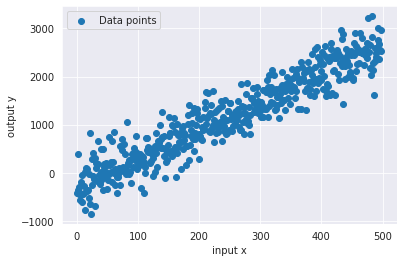

In [ ]:
plt.scatter(df[0].values,df[1].values)
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["Data points"])
plt.show()

The above plot depicts the distribution of datapoints in the dataset before normalization. It can be observed that x ranges from 0 to 500 and y ranges from -1000 to 3254

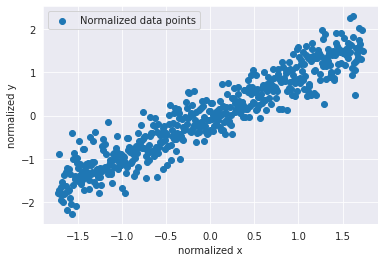

In [ ]:
plt.scatter(normalized_df[0].values,normalized_df[1].values)
plt.xlabel("normalized x"); plt.ylabel("normalized y")
plt.legend(["Normalized data points"])
plt.show()

The above plot depicts the dataset after normalisation. It can be observed that x ranges from -2 to 2 and y ranges from -2.5 to 2.5

**Question a)**

**iii) Gradient Descent and Linear Regression**

In [ ]:
def gradient_descent(learning_rate, epochs, plotting):

  n = len(normalized_df[0])
  theta_1 = 0
  theta_0 = 0
  costs = []

  for epoch in range(epochs):

    cost = 0

    for x, y in zip(normalized_df[0], normalized_df[1]):
      cost += (1/n)*((y - (theta_1 * x + theta_0)) ** 2)
      delta_theta_1 = -(1/n) * 2 * (y -(theta_1 * x + theta_0)) * x
      delta_theta_0 = -(1/n) * 2 * (y - (theta_1 * x + theta_0))

      theta_1_update = learning_rate * delta_theta_1
      theta_0_update = learning_rate * delta_theta_0

      theta_1 -= theta_1_update
      theta_0 -= theta_0_update

    costs.append(cost)

  if(plotting):
    plt.plot(costs)
    plt.xlabel("epochs"); plt.ylabel("cost")
  return theta_1, theta_0, costs[-1]

Gradient descent is an optimization algorithm used to optimize the training process of machine learning model. An objective function is minimized by updating the parameters. The steps taken to reach the minimum is decided by learning rate. Different values of theta0 and theta1 are used and the cost is calculated throughout the process. The values of theta0 and theta1 that provide the least cost are chosen for the model. The above code is an implementation of gradient descent in vanilla python, it takes the learning rate and number of iterations as parameters. It also plots the cost throughout the iterations.

In [ ]:
def linear_reg(z):
  theta_1, theta_0, cost = gradient_descent(0.005,1000,False)
  return theta_1*z + theta_0

The above code represents the linear regression model which uses gradient descent to determine the theta values.

Since its a linear model the equation would be y = mx + c and the same is used in the code to make predictions. Basically we are trying to plot a line that best fits the data points in the dataset.
I am using 0.005 as the learning rate as I found this to be reasonable and optimal. This value is neither too big to miss the minimum nor too small to take a really long time to converge to the mininum.

**Question b)**

**i) Different learning rates - 0.1, 0.01, 0.001**

(0.9430998464503256, -4.3111582604814206e-05, 0.1110756307667723)

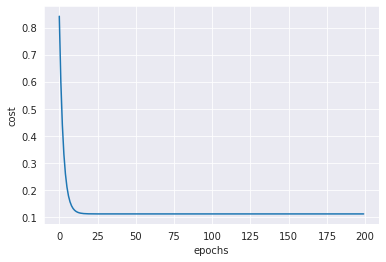

In [ ]:
gradient_descent(0.1,200,True)

The above plot shows the cost at each iteration when the learning rate is 0.1
There is a steep decrease in the cost as the step size is big.

(0.9253904340229333, 0.00015773989834236822, 0.11129864013261485)

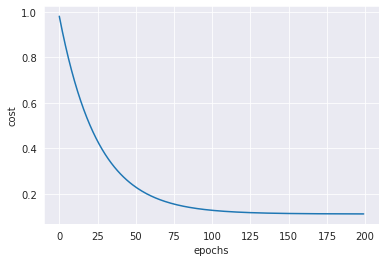

In [ ]:
gradient_descent(0.01,200,True)

The above plot shows the cost at each iteration when the learning rate is 0.01 There is a gradual decrease in the cost when compared to the previous plot.

(0.31030459907327274, 5.843081974505456e-05, 0.5109825562253043)

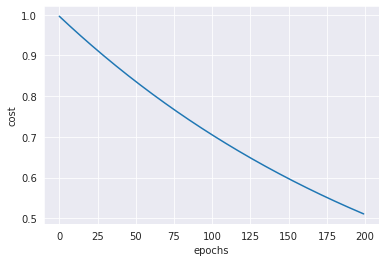

In [ ]:
gradient_descent(0.001,200,True)

The above plot shows the cost at each iteration when the learning rate is 0.001 There is a very smooth decrease in the cost and it has not reached minimum even after 200th iteration. This is because the learning rate is very small and it takes more iterations to reach the minimum.

(0.872375689446118, 4.1995810624103385e-05, 0.1159367373644358)

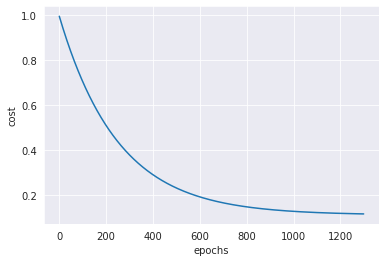

In [ ]:
gradient_descent(0.001,1300,True)

The above plot shows the cost at each iteration when the learning rate is 0.001 for 1300 iterations. We can observe that curve reaches the minimum after 1000 iterations and remains constant.

**Question b)**

**ii) Parameters of the trained linear regression**

In [ ]:
predictions = []
for data in normalized_df[0]:
  predictions.append(linear_reg(data))
theta_1, theta_0, cost = gradient_descent(0.005,1000,False)
print("theta0 of linear regression is ",theta_0)
print("theta1 of linear regression is ",theta_1)
print("cost of linear regression is ",cost)

theta0 of linear regression is  -8.411935575323572e-07
theta1 of linear regression is  0.9427331693301438
cost of linear regression is  0.11098666790994485


The model parameters - theta_1, theta_0, cost are reported using the above piece of code.

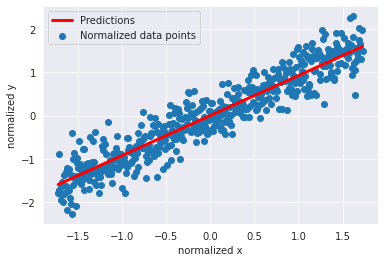

In [ ]:
plt.scatter(normalized_df[0].values,normalized_df[1].values)
plt.plot(normalized_df[0], predictions, color='red', linewidth=3)
plt.xlabel("normalized x"); plt.ylabel("normalized y")
plt.legend(["Predictions","Normalized data points"])
plt.show()

The above plot represents the normalized data points and the trained linear regression model predictions.

**Question b)**

**iii) Baseline model**

In [ ]:
baseline_cost = 0
n = len(normalized_df[1])
for y in normalized_df[1]:
  baseline_cost += (1/n)*((y - 0) ** 2)
print(baseline_cost)

0.9979959919839669


A base model is considered in the above code. This base model always predicts 0 as the output and hence the cost is 0.9979 which is really high when compared to the linear regression model trained using gradient descent which is 0.1109

**Question b)**

**iv) Linear Regression using sklearn**

In [ ]:
X_in = np.array((normalized_df.iloc[:,0]))
X_in = X_in.reshape(-1,1)
y_in = np.array((normalized_df.iloc[:,1]))
y_in = y_in.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_in, y_in)
print(model.intercept_, model.coef_)

[-6.80227729e-16] [[0.94275937]]


When sklearn was used to train a linear regression model the intercept was -6.80227729e-16 and the slope was 0.94275937 which is very close when compared to the vanilla code model, whose values for intercept and slope was -8.411935575323572e-07 and 0.9427331693301438 respectively.

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/ML_Assignment_Week1.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML_Assignment_Week1.ipynb to PDF
[NbConvertApp] Support files will be in ML_Assignment_Week1_files/
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Making directory ./ML_Assignment_Week1_files
[NbConvertApp] Writing 43110 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 126258 bytes to /content

This segment of code was used to convert the ipynb file to PDF